In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
random.seed(42)

In [ ]:
g=nx.Graph()

In [ ]:
num_users=20

In [ ]:
user_nodes= range(1, num_users+1)

In [ ]:
user_nodes[9]

10

In [ ]:
g.add_nodes_from(user_nodes, node_type='user')

In [ ]:
area= (100, 100)

In [ ]:
g.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [ ]:
for user in user_nodes:
    x= random.uniform(0, area[0])
    y= random.uniform(0, area[1])
    g.nodes[user]['pos']= (x, y)

In [ ]:
p= nx.get_node_attributes(g, 'pos')

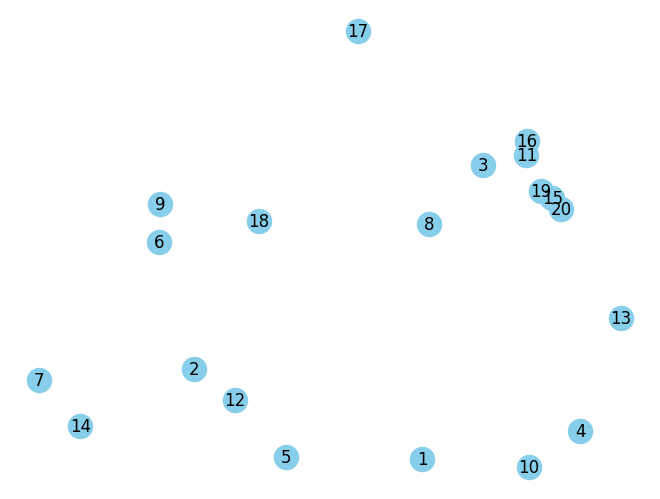

In [ ]:
nx.draw(g, p , with_labels=True, node_size=300, node_color='skyblue', font_color='black')

In [ ]:
d_thresh= 20

In [ ]:
g.nodes[1]['pos']

(63.942679845788376, 2.5010755222666936)

In [ ]:
for i in range(num_users):
    for j in range(i+1, num_users):
        x1=g.nodes[i+1]['pos'][0]
        y1=g.nodes[i+1]['pos'][1]
        x2=g.nodes[j+1]['pos'][0]
        y2=g.nodes[j+1]['pos'][1]

        d= np.linalg.norm(np.array([x1, y1])-np.array([x2,y2]))
        if d<d_thresh:
            g.add_edge(i+1, j+1, dummy_edge='False')

In [ ]:
g.edges.data(True)

EdgeDataView([(1, 10, {'dummy_edge': 'False'}), (2, 12, {'dummy_edge': 'False'}), (3, 8, {'dummy_edge': 'False'}), (3, 11, {'dummy_edge': 'False'}), (3, 15, {'dummy_edge': 'False'}), (3, 16, {'dummy_edge': 'False'}), (3, 19, {'dummy_edge': 'False'}), (3, 20, {'dummy_edge': 'False'}), (4, 10, {'dummy_edge': 'False'}), (5, 12, {'dummy_edge': 'False'}), (6, 9, {'dummy_edge': 'False'}), (6, 18, {'dummy_edge': 'False'}), (7, 14, {'dummy_edge': 'False'}), (8, 19, {'dummy_edge': 'False'}), (9, 18, {'dummy_edge': 'False'}), (11, 15, {'dummy_edge': 'False'}), (11, 16, {'dummy_edge': 'False'}), (11, 19, {'dummy_edge': 'False'}), (11, 20, {'dummy_edge': 'False'}), (15, 16, {'dummy_edge': 'False'}), (15, 19, {'dummy_edge': 'False'}), (15, 20, {'dummy_edge': 'False'}), (16, 19, {'dummy_edge': 'False'}), (16, 20, {'dummy_edge': 'False'}), (19, 20, {'dummy_edge': 'False'})])

In [ ]:
p= nx.get_node_attributes(g, 'pos')

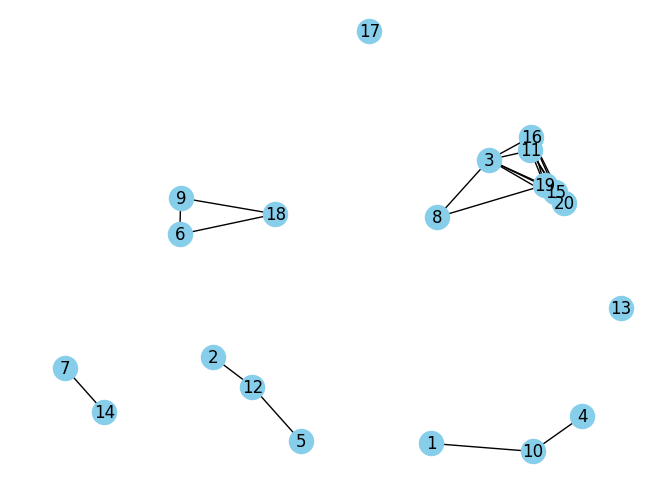

In [ ]:
nx.draw(g, p , with_labels=True, node_size=300, node_color='skyblue', font_color='black')

In [ ]:
g.nodes[1]

{'node_type': 'user', 'pos': (63.942679845788376, 2.5010755222666936)}

In [ ]:
num_anchors=100

In [ ]:
anchors= range(num_users+1, num_users+num_anchors+1)

In [ ]:
g.add_nodes_from(anchors, node_type='anchor')

In [ ]:
g.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120))

In [ ]:
for anchor in anchors:
    x= random.uniform(0, area[0])
    y= random.uniform(0, area[1])
    g.nodes[anchor]['pos']= (x, y)

In [ ]:
p= nx.get_node_attributes(g, 'pos')

In [ ]:
node_color= ['green' if g.nodes[node]['node_type']=='user' else 'yellow' for node in g.nodes]

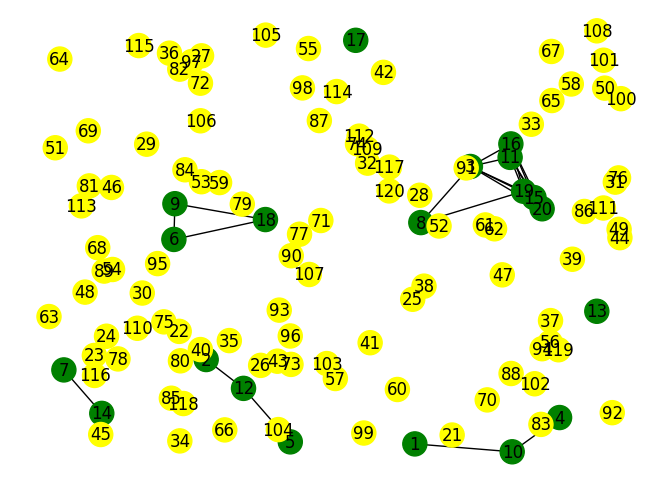

In [ ]:
nx.draw(g, p, node_color= node_color, node_size=300, with_labels=True, font_color='black')

In [ ]:
anchor_thresh=20

In [ ]:
from scipy.spatial.distance import euclidean

In [ ]:
for user in user_nodes:
    user_pos = g.nodes[user]['pos']
    dists = [(anchor, euclidean(user_pos, g.nodes[anchor]['pos'])) for anchor in anchors]
    dists.sort(key=lambda x: x[1])
    g.nodes[user]['nearest'] = [anchor[0] for anchor in dists[:20]]

    for i in range(min(anchor_thresh, len(dists))):
        g.add_edge(user, dists[i][0], dummy_edge='False')

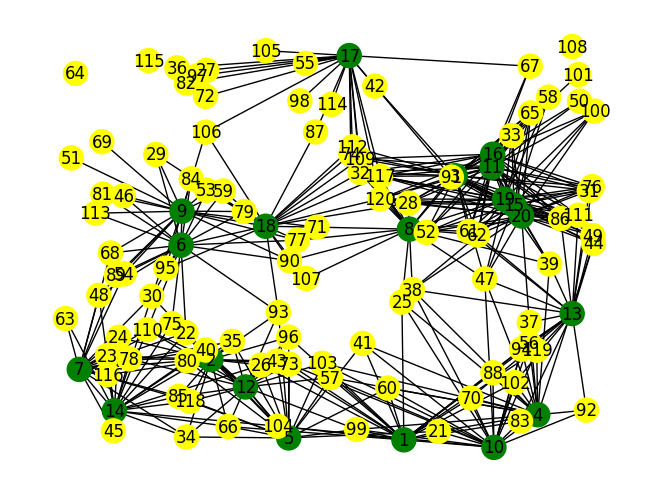

In [ ]:
nx.draw(g, p, node_color= node_color, node_size=300, with_labels=True, font_color='black')

In [ ]:
g.nodes[1]['nearest'][2:10]

[60, 70, 57, 83, 88, 104, 103, 41]

In [ ]:
near_thresh=8

In [ ]:
for u1 in user_nodes:
    for u2 in user_nodes:
        if u1<u2:
            anchor_u1= set(g.nodes[u1]['nearest'][:20])
            anchor_u2= set(g.nodes[u2]['nearest'][:20])

            common= anchor_u1.intersection(anchor_u2)
            if len(common)>=near_thresh:
                if not g.has_edge(u1, u2):
                    g.add_edge(u1, u2, dummy_edge=True)

In [ ]:
g.has_edge(1, 2)

False

In [ ]:
g.edges(data=True)

EdgeDataView([(1, 10, {'dummy_edge': 'False'}), (1, 21, {'dummy_edge': 'False'}), (1, 99, {'dummy_edge': 'False'}), (1, 60, {'dummy_edge': 'False'}), (1, 70, {'dummy_edge': 'False'}), (1, 57, {'dummy_edge': 'False'}), (1, 83, {'dummy_edge': 'False'}), (1, 88, {'dummy_edge': 'False'}), (1, 104, {'dummy_edge': 'False'}), (1, 103, {'dummy_edge': 'False'}), (1, 41, {'dummy_edge': 'False'}), (1, 102, {'dummy_edge': 'False'}), (1, 73, {'dummy_edge': 'False'}), (1, 43, {'dummy_edge': 'False'}), (1, 94, {'dummy_edge': 'False'}), (1, 26, {'dummy_edge': 'False'}), (1, 66, {'dummy_edge': 'False'}), (1, 96, {'dummy_edge': 'False'}), (1, 119, {'dummy_edge': 'False'}), (1, 56, {'dummy_edge': 'False'}), (1, 25, {'dummy_edge': 'False'}), (1, 4, {'dummy_edge': True}), (1, 5, {'dummy_edge': True}), (1, 12, {'dummy_edge': True}), (2, 12, {'dummy_edge': 'False'}), (2, 40, {'dummy_edge': 'False'}), (2, 80, {'dummy_edge': 'False'}), (2, 35, {'dummy_edge': 'False'}), (2, 22, {'dummy_edge': 'False'}), (2, 26,

In [ ]:
dummy= [(u, v) for u,v, data in g.edges(data=True) if data['dummy_edge']==True]

In [ ]:
len(g.edges)

448

In [ ]:
len(dummy)

23

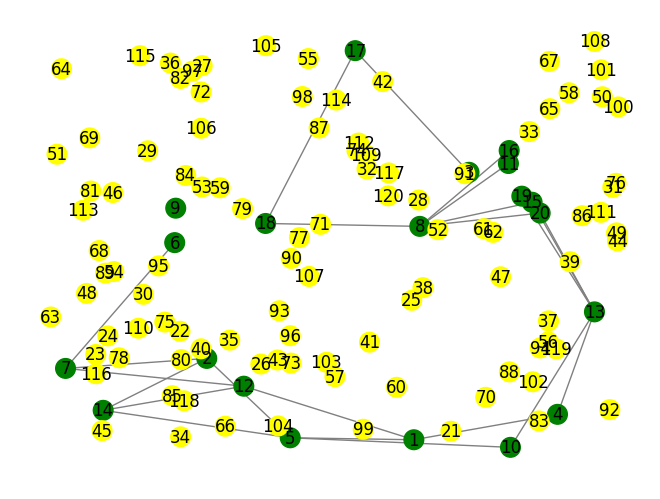

In [ ]:
nx.draw(g, p, node_color=node_color, node_size=200, with_labels=True, edgelist=dummy, edge_color='gray')

In [ ]:
edge_color=['red' if data['dummy_edge']==True else 'black' for u, v, data in g.edges(data=True)]

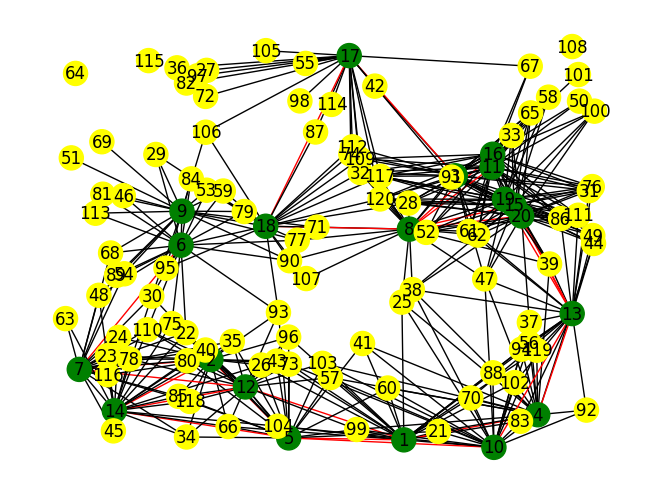

In [ ]:
nx.draw(g, p, node_color=node_color, node_size=300, with_labels=True, edge_color=edge_color)

In [ ]:
non_dummy = [(u, v) for u, v, data in g.edges(data=True) if not data['dummy_edge']==True]

In [ ]:
len(non_dummy)

425

In [ ]:
len(g.edges)

448

In [ ]:
len(dummy)

23

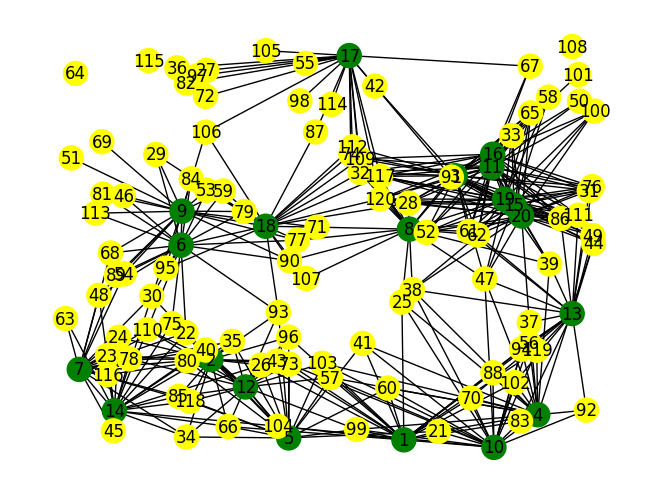

In [ ]:
nx.draw(g, p, node_color=node_color, node_size=300, with_labels=True, edgelist= non_dummy, edge_color='black')

In [ ]:
V= num_users

In [ ]:
num_users

20

In [ ]:
limit=4

In [ ]:
def is_safe(v, graph, color, c,count):
    for i in range(V):
        if ((graph[v][i] and c==color[i]) or count[c]==limit):
            return False
    return True

In [ ]:
def graph_color(graph, m, color, v,count):
    if v==V:
        return True

    for c in range(1, m+1):
        if is_safe(v, graph, color, c,count):
            color[v]=c
            count[c]=count[c] + 1
            if graph_color(graph, m, color, v+1,count):
                return True

        color[v]=0

    return False

In [ ]:
def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    for i in range(V):
        print(color[i], end=" ")
    print("\n")

In [ ]:
def coloring(graph, m):
    color= [0]*V
    count = [0]*(m+1)
    if not graph_color(graph, m, color, 0,count):
        print("Solution does not exist")
        return False

    print_solution(color)
    print("Length of color array:", len(color))  # Add this line
    return color

In [ ]:
nx.get_node_attributes(g, 'node_type').items()

dict_items([(1, 'user'), (2, 'user'), (3, 'user'), (4, 'user'), (5, 'user'), (6, 'user'), (7, 'user'), (8, 'user'), (9, 'user'), (10, 'user'), (11, 'user'), (12, 'user'), (13, 'user'), (14, 'user'), (15, 'user'), (16, 'user'), (17, 'user'), (18, 'user'), (19, 'user'), (20, 'user'), (21, 'anchor'), (22, 'anchor'), (23, 'anchor'), (24, 'anchor'), (25, 'anchor'), (26, 'anchor'), (27, 'anchor'), (28, 'anchor'), (29, 'anchor'), (30, 'anchor'), (31, 'anchor'), (32, 'anchor'), (33, 'anchor'), (34, 'anchor'), (35, 'anchor'), (36, 'anchor'), (37, 'anchor'), (38, 'anchor'), (39, 'anchor'), (40, 'anchor'), (41, 'anchor'), (42, 'anchor'), (43, 'anchor'), (44, 'anchor'), (45, 'anchor'), (46, 'anchor'), (47, 'anchor'), (48, 'anchor'), (49, 'anchor'), (50, 'anchor'), (51, 'anchor'), (52, 'anchor'), (53, 'anchor'), (54, 'anchor'), (55, 'anchor'), (56, 'anchor'), (57, 'anchor'), (58, 'anchor'), (59, 'anchor'), (60, 'anchor'), (61, 'anchor'), (62, 'anchor'), (63, 'anchor'), (64, 'anchor'), (65, 'anchor'

In [ ]:
user1= [node for node, node_type in nx.get_node_attributes(g, 'node_type').items() if node_type=='user']

In [ ]:
user_g= nx.subgraph(g, user1)

In [ ]:
g

In [ ]:
user_g

In [ ]:
p1= nx.get_node_attributes(user_g, 'pos')

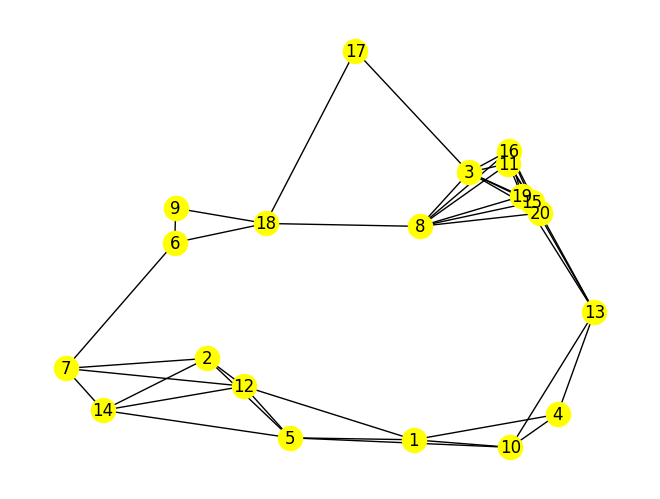

In [ ]:
nx.draw(user_g, p1, node_color= 'yellow', node_size=300, with_labels=True, font_color='black')

In [ ]:
user_g.edges(data=True)

EdgeDataView([(1, 10, {'dummy_edge': 'False'}), (1, 4, {'dummy_edge': True}), (1, 5, {'dummy_edge': True}), (1, 12, {'dummy_edge': True}), (2, 12, {'dummy_edge': 'False'}), (2, 5, {'dummy_edge': True}), (2, 7, {'dummy_edge': True}), (2, 14, {'dummy_edge': True}), (3, 8, {'dummy_edge': 'False'}), (3, 11, {'dummy_edge': 'False'}), (3, 15, {'dummy_edge': 'False'}), (3, 16, {'dummy_edge': 'False'}), (3, 19, {'dummy_edge': 'False'}), (3, 20, {'dummy_edge': 'False'}), (3, 17, {'dummy_edge': True}), (4, 10, {'dummy_edge': 'False'}), (4, 13, {'dummy_edge': True}), (5, 12, {'dummy_edge': 'False'}), (5, 10, {'dummy_edge': True}), (5, 14, {'dummy_edge': True}), (6, 9, {'dummy_edge': 'False'}), (6, 18, {'dummy_edge': 'False'}), (6, 7, {'dummy_edge': True}), (7, 14, {'dummy_edge': 'False'}), (7, 12, {'dummy_edge': True}), (8, 19, {'dummy_edge': 'False'}), (8, 11, {'dummy_edge': True}), (8, 15, {'dummy_edge': True}), (8, 16, {'dummy_edge': True}), (8, 18, {'dummy_edge': True}), (8, 20, {'dummy_edge'

In [ ]:
# Convert NetworkX graph to adjacency matrix
adjacency_matrix = nx.linalg.graphmatrix.adjacency_matrix(user_g).toarray().astype(int)

In [ ]:
adjacency_matrix

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0,

In [ ]:
colors= coloring(adjacency_matrix, 7)

Solution Exists: Following are the assigned colors
1 1 1 2 2 1 2 2 3 3 3 3 4 4 5 4 4 5 6 7 

Length of color array: 20


In [ ]:
user_colors= {user: colors[i] for i, user in enumerate(user_nodes)}

In [ ]:
nx.set_node_attributes(user_g, user_colors, 'color')

In [ ]:
node_c= nx.get_node_attributes(user_g, 'color').values()

In [ ]:
type(non_dummy)

NameError: name 'non_dummy' is not defined

In [ ]:
non_dummy_users= [(u, v) for u, v, data in user_g.edges(data=True) if not data['dummy_edge']==True]

In [ ]:
len(non_dummy_users)

25

In [ ]:
len(user_g.edges)

48

In [ ]:
type(non_dummy_users)

list

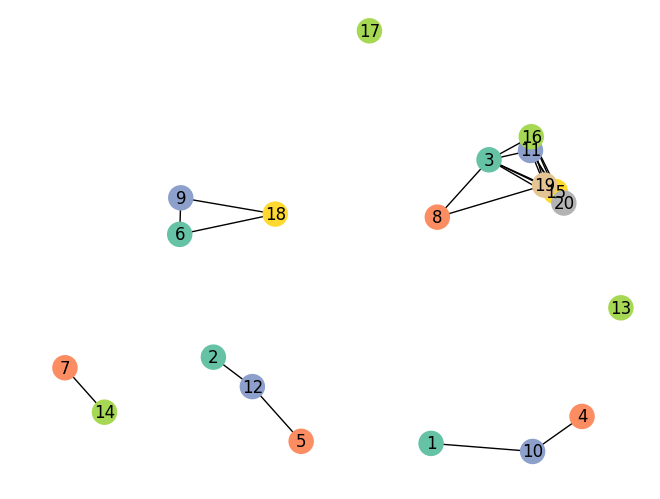

In [ ]:
nx.draw(user_g, p1, node_color=list(node_c), node_size=300, with_labels=True, font_color='black', cmap='Set2', edgelist=non_dummy_users)

In [ ]:
import numpy as np